<h1 style="color:turquoise;">Linear Regression From Scratch</h1>

 ### Importing the libraries

Since this model is built from scratch, without using any framework, so will only be using the basic libraries such as numpy for array manipulation and pandas for loading the dataset. Also, we will be using sklearn for preprocessing the data.

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

### Importing the dataset

In [108]:
dataset = pd.read_csv('50_Startups.csv')

In [92]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Visualizing the dataset

First we will try to find some insights from the dependent variable, "Profit"

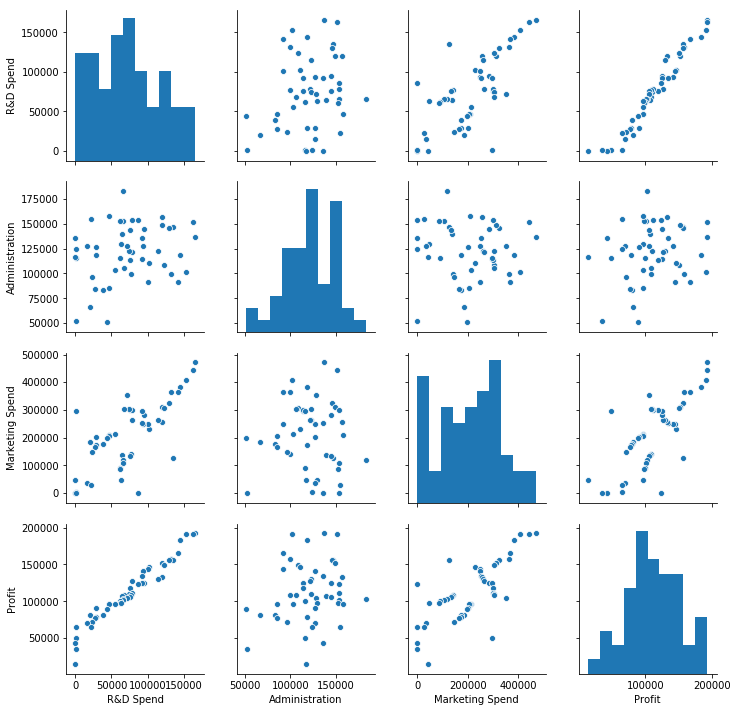

In [93]:
import seaborn as sns
sns.pairplot(dataset)

In [94]:
dataset['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

From the above pairplot we can clearly see that profit has a linear relationship with R&D Spend and also a rough linear relationship with marketing spend. Also, we can infer that Profit has very less correlation with Administration.

#### To make the inferences more clear we can use the correlation matrix

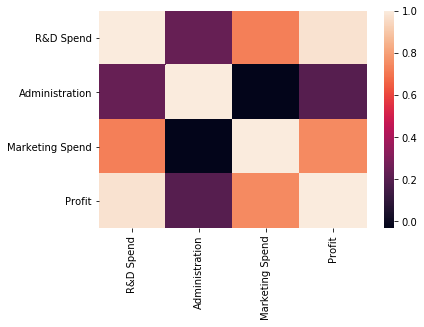

In [95]:
corr = dataset.corr()
sns.heatmap(corr)

One more thing to notice here is the correlation between R&D Spend and Marketing Spend

### Now, we would like to have some insights on the relation between State and Profit

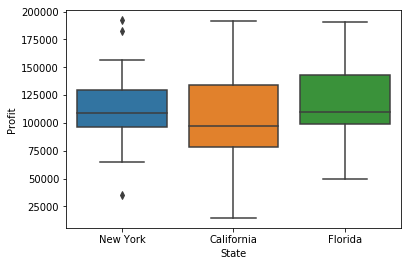

In [96]:
sns.boxplot(x=dataset['State'], y=dataset['Profit'])

From here we can see that California has a very high profit range compared to the other states. But, the median of all the states are almost same.

## Pre-processing the dataset

First we will convert the state feature into labels using the label encoder.

In [97]:
encoder = LabelEncoder()
states = encoder.fit_transform(dataset['State'])
dataset['State'] = states
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Since, administration is not very much correlated to the Profit, we may also remove it from the dataset for better accuracy.

In [109]:
dataset = dataset.drop(['Administration', 'State'], axis=1)
dataset.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


## Splitting the dataset into train and test

In [110]:
train_set = dataset[0:40]
test_set = dataset[40:]

    Defining the LinearRegressionModel :

In [118]:
class LinearRegressionModel():
    
    #Input the training_set and name of attribute to be predicted
    def __init__(self, training_set, y):
        self.y = training_set[y]
        self.x = training_set.drop(y, axis=1)
        self.n = len(training_set.columns)-1
        self.theta = np.matrix(np.random.rand(self.n))
        self.bias = np.random.rand(1)
        self.m = len(self.x)
        self.preprocess()
        
    #Convert given input to usable data structures
    def preprocess(self):
        self.x = np.transpose(self.x.values)
        self.y = np.transpose(self.y.values)
    
    #Performs gradient descent
    def descent(self):
        alpha = 0.000000000015
        for i in range(20000):
            if i%100 == 0:
                print("_________________________________________________________________________")
                print(self.theta, self.bias)
            hypothesis = (self.theta@self.x)+self.bias
            diff = (hypothesis-self.y)
            delta_theta = alpha/self.m*(diff@np.transpose(self.x))                    
            self.theta = self.theta -delta_theta
            delta_bias = np.sum(1/self.m*((hypothesis-self.y)))
            self.bias = self.bias-alpha*delta_bias        
            
    def predict(self,testing_set):
        out = self.theta@testing_set
        return out

    Creating a regression object and applying gradient descent

In [119]:
#Creating a Regression Model
classifier = LinearRegressionModel(train_set, 'Profit')

### Training

In [120]:
classifier.descent()

_________________________________________________________________________
[[0.60265948 0.2238839 ]] [0.3028392]
_________________________________________________________________________
[[0.93092485 0.14747752]] [0.30285099]
_________________________________________________________________________
[[1.01349812 0.118606  ]] [0.30286141]
_________________________________________________________________________
[[1.03505398 0.11106905]] [0.30287152]
_________________________________________________________________________
[[1.04068116 0.10910152]] [0.30288154]
_________________________________________________________________________
[[1.04215014 0.1085879 ]] [0.30289154]
_________________________________________________________________________
[[1.04253362 0.10845382]] [0.30290153]
_________________________________________________________________________
[[1.04263373 0.10841881]] [0.30291152]
_________________________________________________________________________
[[1.04265986 0.10840968

_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30356096]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30357095]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30358094]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30359093]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30360092]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30361091]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.3036209]
_________________________________________________________________________
[[1.04266909 0.10840645]] [0.30363089]
_________________________________________________________________________
[[1.04266909 0.10840645

_________________________________________________________________________
[[1.04266908 0.10840645]] [0.30444018]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30445018]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30446017]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30447016]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30448015]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30449014]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30450013]
_________________________________________________________________________
[[1.04266908 0.10840644]] [0.30451012]
_________________________________________________________________________
[[1.04266908 0.1084064

### Predictions

    Results are predicted using the predict function in LinearRegressionModel class

In [121]:
results = classifier.predict(np.transpose(test_set.drop('Profit', axis=1).values))

In [122]:
results

matrix([[48713.41502284, 46912.77013647, 40693.94085515, 20019.47826902,
         26195.71002528,  1249.30717626, 33580.71166643,     0.        ,
           565.17877515,  4897.05081867]])

    Checking the accuracy of training model

### Results

In [123]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.transpose(results), test_set['Profit']))

34700.03472547348
